# Using matplotlib with police staffing data

This notebook goes through the process of importing police staffing data, cleaning it up and using it for charts with the `matplotlib` library.

First, we need to import the libraries...

In [1]:
#pandas for handling dataframes (tables)
import pandas as pd
#matplotlib for plotting charts
import matplotlib.pyplot as plt
#numpy for doing maths
import numpy as np

## Import the data

...then the data. This is from a House of Commons Library briefing.

In [2]:
#the url of the spreadsheet
officerdataurl = "https://researchbriefings.files.parliament.uk/documents/SN00634/CBP00634-Appendices-September-2021.xlsx"
#read that in, headers start in row 5
policenumbers = pd.read_excel(officerdataurl, skiprows=4)
#show a few rows
policenumbers.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,% change 20-21
0,NaN,NaN,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E23000036,NaN,Avon & Somerset,3160.18,3417.09,3398.31,3439.31,3429.53,3406.64,3355.48,3301.55,3210.16,3211.16,2873.09,2800.00,2706.89,2691.92,2667.31,2596.51,2676.0,2803.29000,2996.850000,0.069047
2,E23000026,NaN,Bedfordshire,1118.78,1199.34,1231.56,1224.52,1203.64,1206.54,1243.89,1246.25,1214.31,1157.05,1091.84,1018.66,1072.91,1082.67,1119.09,1130.43,1164.0,1262.29875,1334.595500,0.057274
3,E23000023,NaN,Cambridgeshire,1390.77,1412.26,1417.99,1448.85,1402.43,1378.73,1449.74,1471.32,1397.50,1377.45,1383.66,1370.38,1361.95,1348.77,1345.68,1383.11,1447.0,1545.06875,1619.905000,0.048436
4,E23000006,NaN,Cheshire,2137,2204.46,2207.23,2217.76,2234.59,2181.08,2180.04,2155.19,2079.34,2011.46,2013.14,1925.36,1952.06,2010.86,2007.64,2020.26,2006.0,2087.70175,2148.521625,0.029132


## Extract the years from the columns for the x axis

We are going to **plot** a chart that shows two series of numbers: 

* numbers of staff, and 
* years. 

To do that, we need two **lists** of numbers. 

In a nutshell, these will be plotted against each other: the first number in list A (staff) will be plotted against the first number in list B (year). 

The results could be plotted as a scatterplot - but also, if we join those numbers in the order they appear, as a line chart.

We need, then, to extract those two lists from our existing dataframe: one each for the x and y axis.

In our case the x axis is time - so we need to extract the years from the column headings using `.columns`

In [7]:
#extract the years as one list - excluding the columns that aren't years
years = list(policenumbers.columns[3:-1])
years

[2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

## Extract the data from one row for the y axis using `iloc[]`

The y axis is staff numbers in each of those years, for one particular force.

This isn't from a *column* in the data - it's from a *row*. 

In [3]:
#show the 4th row
row3 = policenumbers.iloc[3]
#this retains the column headings
row3

Unnamed: 0             E23000023
Unnamed: 1                   NaN
Unnamed: 2        Cambridgeshire
2003                     1390.77
2004                     1412.26
2005                     1417.99
2006                     1448.85
2007                     1402.43
2008                     1378.73
2009                     1449.74
2010                     1471.32
2011                      1397.5
2012                     1377.45
2013                     1383.66
2014                     1370.38
2015                     1361.95
2016                     1348.77
2017                     1345.68
2018                     1383.11
2019                        1447
2020                     1545.07
2021                     1619.91
% change 20-21         0.0484355
Name: 3, dtype: object

In [ ]:
#this is a pandas 'series'
type(row3)

pandas.core.series.Series

In [4]:
#convert to a list
row3 = list(row3)
#this then removes the column headings
row3

['E23000023',
 nan,
 'Cambridgeshire',
 1390.77,
 1412.2600000000002,
 1417.99,
 1448.85,
 1402.43,
 1378.73,
 1449.74,
 1471.3200000000002,
 1397.5,
 1377.4499999999998,
 1383.66,
 1370.38,
 1361.95,
 1348.77,
 1345.6799999999998,
 1383.1100000000001,
 1447.0,
 1545.068749999999,
 1619.9050000000002,
 0.04843554696190777]

In [5]:
#reduce to same size as year list
row3 = row3[3:-1]
row3

[1390.77,
 1412.2600000000002,
 1417.99,
 1448.85,
 1402.43,
 1378.73,
 1449.74,
 1471.3200000000002,
 1397.5,
 1377.4499999999998,
 1383.66,
 1370.38,
 1361.95,
 1348.77,
 1345.6799999999998,
 1383.1100000000001,
 1447.0,
 1545.068749999999,
 1619.9050000000002]

## Plot the two lists with `plot()`

Now we've got the two lists we can [use `plt.plot()` to plot those](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).

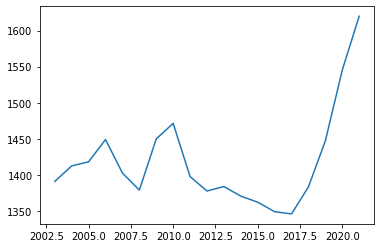

In [8]:
plt.plot(years, row3)

## Line chart by default?

Note that by default it 'joins the dots' to make a line chart. But [we can specify we want a different option](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) such as unjoined dots, and different colours and shapes. More on this later.

## Adding labels and titles to our plot object with `.ylabel()` and `.xlabel()`

We can add labels using the `.ylabel()` and `xlabel()` functions, and a title using the `.title()` function. All of these just need a string containing the label you want to add.

These are essentially setting the **properties** of the `plt` *object*. Think of it as a variable - a dictionary, for example - which you can add extra key-value pairs to (or specify the values of particular keys such as `xlabel`).

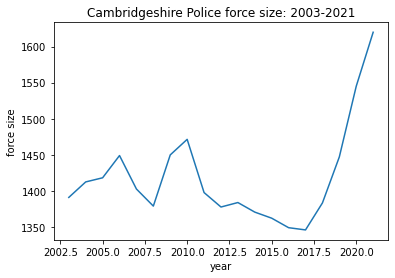

In [ ]:
plt.plot(years, row3)
plt.ylabel('force size')
plt.xlabel('year')
plt.title('Cambridgeshire Police force size: 2003-2021')
plt.show()

## Controlling the axis scale by specifying `.axis()`

At the moment the years in the x axis are odd - we have 'half year points' like 2002.5 for example (and the data only starts from 2003).

To fix that we can specify the `.axis()`

This takes a **list** of four numbers: the start and end of the x axis, followed by the start and end of the y axis.

Not only are our years problematic but the y axis is, too. This is because it takes the lowest and highest numbers as the range, but that can be misleading. It will be even worse when compared with other forces if the axes aren't the same, so below we've picked a range from 1000 to 2000 - this is an editorial choice and not the only one, and we can go from there to decide if it's the right one.

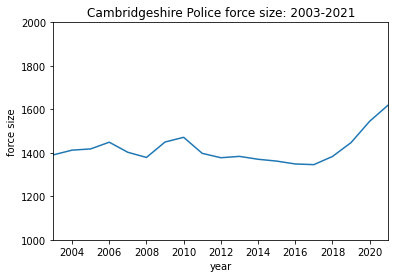

In [ ]:
plt.plot(years, row3)
plt.ylabel('force size')
plt.xlabel('year')
plt.title('Cambridgeshire Police force size: 2003-2021')
plt.axis([2003,2021,1000,2000])
plt.show()

## Changing the markers and line using `.plot()`

Now let's try to change those markers. We do that in the `.plot()` line - with an extra parameter.

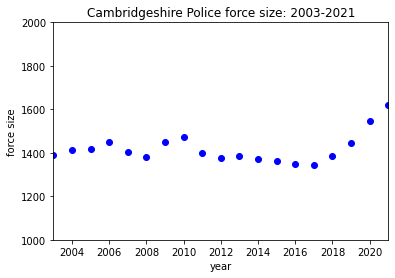

In [ ]:
#this time specify an extra argument: 'bo' for 'blue circle'
plt.plot(years, row3, 'bo')
plt.ylabel('force size')
plt.xlabel('year')
plt.title('Cambridgeshire Police force size: 2003-2021')
plt.axis([2003,2021,1000,2000])
plt.show()

The `o` in `'bo'` represents a circle. The `b` represents blue. So `'ro'` means red circle and `'go'` means green circle.

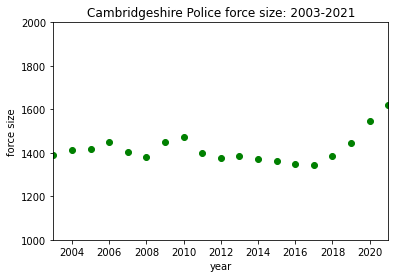

In [ ]:
#this time specify an extra argument: 'go' for 'green circle'
plt.plot(years, row3, 'go')
plt.ylabel('force size')
plt.xlabel('year')
plt.title('Cambridgeshire Police force size: 2003-2021')
plt.axis([2003,2021,1000,2000])
plt.show()

You can [find some explanation of this in a Stackoverflow thread](https://stackoverflow.com/questions/20440341/calling-colours-in-python-pylab): we are basically using some shorthand. A useful [list of the options in that shorthand can be found in this page of documentation](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html).

For more options we can specify each property separately, using `color=`, `marker=` and `linestyle=`. If we don't want a line, we specify `linestyle='none'`.

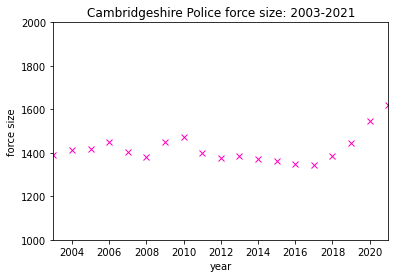

In [ ]:
#this time specify a different colour, 'x' markers and no line
plt.plot(years, row3, color='#ff00bb', marker='x', linestyle='none')
plt.ylabel('force size')
plt.xlabel('year')
plt.title('Cambridgeshire Police force size: 2003-2021')
plt.axis([2003,2021,1000,2000])
plt.show()

There are also additional parameters like `markersize=` and `markerfacecolor=`, [among others listed here](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html).

The `alpha=` argument, for example, specifies opacity, from 0.0 (not opaque - in other words, invisible) to 1.0 (fully opaque). Below we've set it to 0.4 to make it 40% opaque (or 60% transparent, depending if you're a glass-half-transparent kind of person).

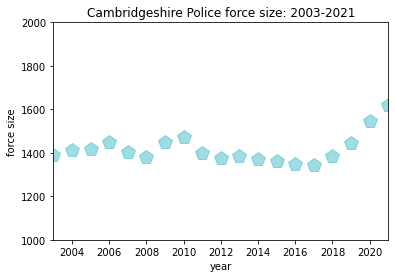

In [ ]:
#this time specify a different colour, pentagon markers at 15px and 40% opacity
plt.plot(years, row3, color='#11aabb', marker='p', linestyle='none', markersize=15, alpha=.4)
plt.ylabel('force size')
plt.xlabel('year')
plt.title('Cambridgeshire Police force size: 2003-2021')
plt.axis([2003,2021,1000,2000])
plt.show()

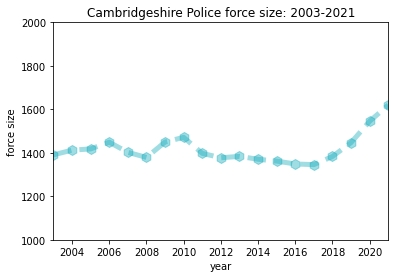

In [ ]:
#specify we have want a 10px size hexagon, a dashed line 5px wide, and all to be 40% opaque
plt.plot(years, row3, color='#11aabb', marker='h', markersize=10, linestyle='dashed', linewidth=5, alpha=.4)
plt.ylabel('force size')
plt.xlabel('year')
plt.title('Cambridgeshire Police force size: 2003-2021')
plt.axis([2003,2021,1000,2000])
plt.show()

## Create a bar chart using `.bar()`

The basic `plot()` creates scatterplots and line charts. For a bar chart we need `.bar()`

This needs at least two arguments: your x axis, and the values to be used to determine the length of the bars in the y axis.

<BarContainer object of 19 artists>

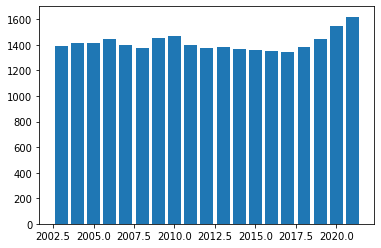

In [ ]:
#The x axis is years, the y axis is the staff numbers in row3
plt.bar(years, row3)

Like before, we can also specify the axes start and end points

(2002.0, 2022.0, 1000.0, 2000.0)

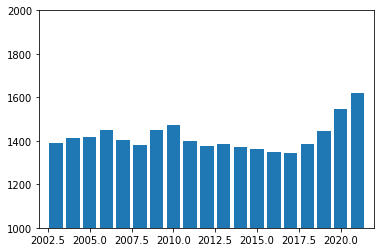

In [ ]:
#The x axis is years, the y axis is the staff numbers in row3
plt.bar(years, row3)
#specify the axes - note that this is the other way around to before
plt.axis([2002,2022,1000,2000])

Note that if we get those the wrong way wrong, the years (2011, etc) are used as values to size the bars. And the staff totals are distanced based on their scale.

Essentially we are not creating a bar chart as such - we are creating a **histogram**, showing the distribution of values against a scale: when the values are reversed this becomes apparent because the staff numbers are not shown in the order they appear, but in *ascending order of value* - in other words, a **continuum**.

<BarContainer object of 19 artists>

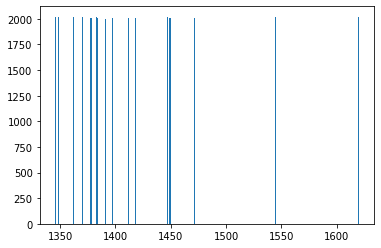

In [ ]:
#The y axis is years, the x axis is the staff numbers in row3
plt.bar(row3, years)

We can make this clearer by adding the names of the parameters.

<BarContainer object of 19 artists>

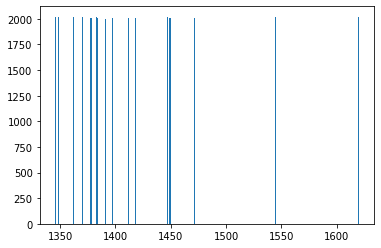

In [ ]:
#The main two parameters are 'x=' and 'height='
plt.bar(x = row3, height = years)

We can also [specify extra parameters](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html), like the width of the bars.

<BarContainer object of 19 artists>

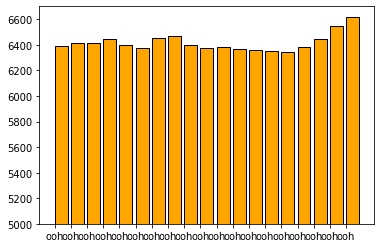

In [ ]:
#specify width as 0.8 of full width and other parameters
plt.bar(x = years, 
        height = row3,
        width = 0.8,
        bottom = 5000,
        align = 'edge',
        color = 'orange',
        edgecolor = 'black',
        tick_label = 'ooh')

You can even indicate margins of error or other types of uncertainty with `yerr=` (size of error bars) and `ecolor=` (colour of error bars)

### Using non-numeric labels

Our data so far has used two numeric lists. A bar chart normally has category lists, however. Let's show numbers for each force in one year instead.

In [ ]:
#store the forces as a list
forces = policenumbers['Unnamed: 2']
#store the numbers for the latest year
staff21 = policenumbers.iloc[:,-1]
staff21

0          NaN
1     0.069047
2     0.057274
3     0.048436
4     0.029132
5     0.067814
6     0.024117
7     0.017408
8     0.052942
9     0.036200
10    0.064369
11    0.035326
12    0.034368
13    0.032008
14    0.129162
15    0.054075
16    0.044503
17    0.034447
18    0.044016
19    0.112183
20    0.064759
21    0.119275
22    0.085857
23    0.023436
24    0.041799
25    0.059450
26    0.082580
27    0.004147
28    0.053186
29    0.126034
30    0.049400
31    0.055079
32    0.081889
33    0.044423
34    0.021097
35    0.024113
36    0.026402
37    0.102849
38    0.044465
39    0.070820
40    0.048152
41         NaN
42         NaN
43    0.014998
44    0.039055
45    0.053629
46    0.053620
47    0.044466
48         NaN
49    0.047951
50         NaN
51   -0.229560
52   -0.020918
53         NaN
54    0.039088
55         NaN
56         NaN
Name: % change 20-21, dtype: float64

### Using `.isna()` to remove items without numbers

Some of the forces don't have a number. We can clean that up by:

* Using `.isna()` to generate a list of True/False values
* Use those values as a series of indices to fetch force names in the corresponding position

In [ ]:
#is each value in staff21 NaN?
print(staff21.isna())

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
50     True
51    False
52    False
53     True
54    False
55     True
56     True
Name: % change 20-21, dtype: bool


In [ ]:
#use that list as a filter
forces[staff21.isna()]

0                                              England 
41                                                  NaN
42                                                Wales
48                                                  NaN
50                                                  NaN
53                                                  NaN
55                                                  NaN
56    Source: Home Office, Police Workforce: England...
Name: Unnamed: 2, dtype: object

Note that this grabs elements that *are* NaN, so we need to add a minus before the index to indicate a negative match.

In [ ]:
#use that list as a filter
forces[-staff21.isna()]

1                 Avon & Somerset
2                    Bedfordshire
3                  Cambridgeshire
4                        Cheshire
5                       Cleveland
6                         Cumbria
7                      Derbyshire
8                Devon & Cornwall
9                          Dorset
10                         Durham
11                          Essex
12                Gloucestershire
13             Greater Manchester
14                      Hampshire
15                  Hertfordshire
16                     Humberside
17                           Kent
18                     Lancashire
19                 Leicestershire
20                   Lincolnshire
21                London, City of
22                     Merseyside
23            Metropolitan Police
24                        Norfolk
25               Northamptonshire
26                    Northumbria
27                North Yorkshire
28                Nottinghamshire
29                South Yorkshire
30            

In [ ]:
staff21[-staff21.isna()]

1     0.069047
2     0.057274
3     0.048436
4     0.029132
5     0.067814
6     0.024117
7     0.017408
8     0.052942
9     0.036200
10    0.064369
11    0.035326
12    0.034368
13    0.032008
14    0.129162
15    0.054075
16    0.044503
17    0.034447
18    0.044016
19    0.112183
20    0.064759
21    0.119275
22    0.085857
23    0.023436
24    0.041799
25    0.059450
26    0.082580
27    0.004147
28    0.053186
29    0.126034
30    0.049400
31    0.055079
32    0.081889
33    0.044423
34    0.021097
35    0.024113
36    0.026402
37    0.102849
38    0.044465
39    0.070820
40    0.048152
43    0.014998
44    0.039055
45    0.053629
46    0.053620
47    0.044466
49    0.047951
51   -0.229560
52   -0.020918
54    0.039088
Name: % change 20-21, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

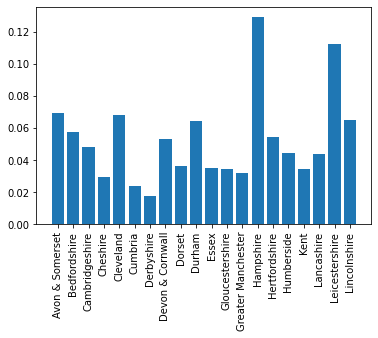

In [ ]:
#plot the lists generated by using those indexes - and apply another index on top (the first 20)
plt.bar(x = forces[-staff21.isna()][:20], 
        height = staff21[-staff21.isna()][:20])
#rotate the labels
plt.xticks(rotation=90)

## Create a horizontal bar chart with `.barh()`

For a horizontal bar chart use `.barh()` with the same two lists.

In [14]:
#convert years to strings
yearstr = [str(i) for i in years]
yearstr

['2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

<BarContainer object of 19 artists>

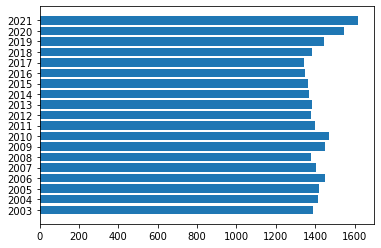

In [16]:
#specify width as 0.8 of full width and other parameters
plt.barh(yearstr, 
         row3)

## Other types of chart

You can find [other examples in the documentation gallery](https://matplotlib.org/stable/gallery/index.html), including grouped bar charts.

## Exporting

You can export with `.savefig()`

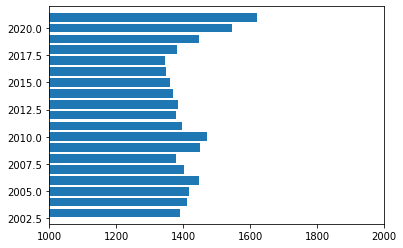

In [ ]:
#specify width as 0.8 of full width and other parameters
plt.barh(years, 
         row3)
#specify the axes - note that this is the other way around to before
plt.axis([1000,2000,2002,2022])
plt.savefig("mybarchart.png")

## Change the size with `.figure()`

You can use `.figure()` to change the size. You need to make sure you do this *before* plotting any data. 

The `plt.figure()` function takes a `figsize=` parameter which needs to specify the width and height you want, in inches.

You can then right-click on the image and open in a new tab to see the image size in a browser.

(1000.0, 2000.0, 2002.0, 2022.0)

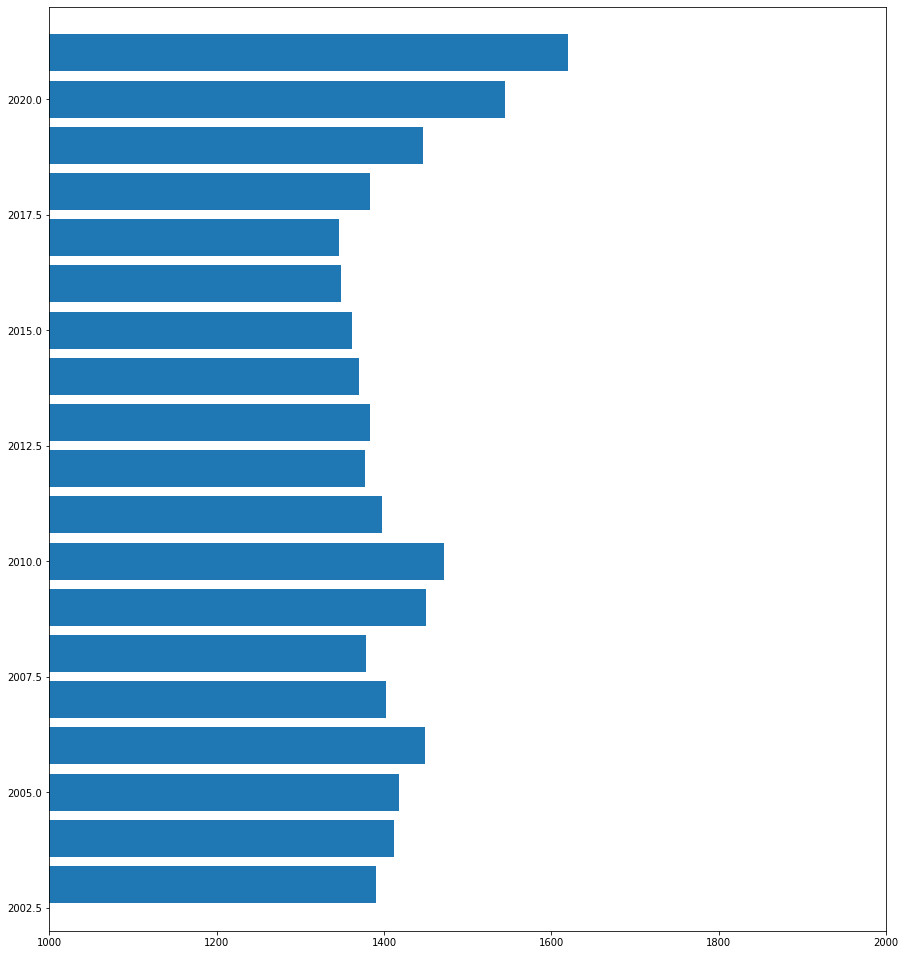

In [ ]:
#set the figure FIRST - width, height in inches
plt.figure(figsize=(15,17))
#specify width as 0.8 of full width and other parameters
plt.barh(years, 
         row3)
#specify the axes - note that this is the other way around to before
plt.axis([1000,2000,2002,2022])


There is a way to size in pixels [detailed in this Stackoverflow thread](https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels):

`my_dpi=96`

`plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)`

The thread then goes on to say:

> "If you want to save a figure of a specific size, then it is a different matter. Screen DPIs are not so important anymore (unless you ask for a figure that won't fit in the screen). Using the same example of the 800x800 pixel figure, we can save it in different resolutions using the dpi keyword of savefig. To save it in the same resolution as the screen just use the same dpi:
>
> `plt.savefig('my_fig.png', dpi=my_dpi)`
> 
> "To to save it as an 8000x8000 pixel image, use a dpi 10 times larger:
>
> `plt.savefig('my_fig.png', dpi=my_dpi * 10)`

## Create a scatterplot with `scatter()`

A scatterplot works much like the `plot()` option, with the key difference being that it doesn't join the dots by default like `plot` does.

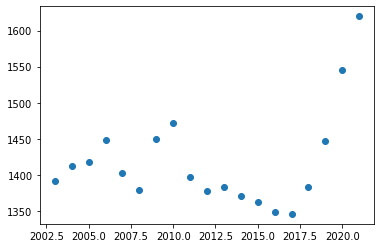

In [9]:
plt.scatter(x = years, y = row3)

You can [see an example in the documentation](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py) which adds further arguments such as the size of the dots (creating a bubble chart) and colour. 